In [264]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Introduction: Variables

1. age
2. sex
3. major
        
4. soc: sense of coherence

5. fr_str: the amount of stress stemming from friendships, maximum = 5
6. romantic_str: the amount of stress stemming from romantic relationships, maximum = 5
7. parent_str: the amount of stress stemming from parents, maximum = 5
8. fam_str: the amount of stress stemming from siblings, relatives and other family members (excluding parents), maximum = 5
9. total_stress: the total amount of stress coming from interpersonal relationships, which equals the sum of four previous variables
    
10. social_support: measure the ability to actively engage in acquiring support from relatives, friends, neighbors and extended family.
11. refraiming: assesses the capability to redefine stressful events in order to make them more manageable. 
12. spiritual_support: seeking spiritual support
13. acquire_accept_help: mobilizing family to acquire and accept help:  the ability to seek out community resources and accept help from others
14. passive_appraisal: passive appraisal: ability to accept problematic issues minimizing reactivity

13. satisfaction: quality of life



# Import Dataset

In [193]:
df_raw = pd.read_csv('Downloads/data_csv.csv')

In [280]:
df = df_raw.drop(['Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20'],axis=1)
df.columns = [['age', 'sex', 'major', 'job', 'soc', 'fr_str', 'romantic_str',
       'parent_str', 'fam_str', 'total_stress', 'social_support', 'refraiming',
       'spiritual_support', 'acquire_accept_help', 'passive_appraisal',
       'satisfaction']]

In [281]:
df.head(5)

,age,sex,major,job,soc,fr_str,romantic_str,parent_str,fam_str,total_stress,social_support,refraiming,spiritual_support,acquire_accept_help,passive_appraisal,satisfaction
0,21,Male,International Business Economics,No,92,1,1,1,1,4,3.5,4.00,3.0,4.5,3.333333,25
1,20,Female,Business Chinese,<25 hours/ week,91,3,1,1,1,6,1.5,1.25,1.5,1.5,4.000000,13
2,20,Female,Hospitality Management,No,91,2,3,3,5,13,3.0,2.75,2.5,3.0,4.333333,20
3,20,Female,Accounting,No,98,1,1,1,1,4,3.5,3.75,1.5,3.5,3.666667,29
4,19,Female,Law,No,86,4,4,4,3,15,1.5,1.50,2.0,3.0,4.333333,20


# Sample Characteristics

 ### 1. Mean, standard deviation, min, max, quartiles

In [196]:
df.describe()

,age,soc,fr_str,romantic_str,parent_str,fam_str,total_stress,social_support,reframing,spiritual_support,acquire_accept_help,passive_appraisal,satisfaction
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,19.987013,89.805195,2.480519,2.389610,2.584416,2.402597,9.857143,3.162338,3.581169,2.318182,2.974026,3.064935,21.233766
std,0.924712,7.600275,1.220552,1.339244,1.341157,1.183880,3.694642,0.860086,0.854017,0.928032,0.938560,0.920906,6.223673
min,18.000000,70.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000
25%,20.000000,85.000000,1.000000,1.000000,1.000000,1.000000,7.000000,2.500000,3.000000,1.500000,2.500000,2.333333,18.000000
50%,20.000000,90.000000,2.000000,2.000000,2.000000,2.000000,10.000000,3.000000,3.750000,2.500000,3.000000,3.000000,21.000000
75%,20.000000,95.000000,3.000000,3.000000,4.000000,3.000000,12.000000,4.000000,4.250000,3.000000,3.500000,3.666667,26.000000
max,23.000000,105.000000,5.000000,5.000000,5.000000,5.000000,20.000000,5.000000,5.000000,4.500000,4.500000,5.000000,35.000000


### 2. Majors

In [138]:
df.groupby('major').size()

major
Accounting                           2
Auditing                             1
Business Administration             11
Business Chinese                     1
Business French                      1
Business Japanese                    1
Finance & Banking                   18
Hospitality Management               2
International Business               4
International Business Economics    16
International Economics              7
Law                                  3
Marketing                           10
dtype: int64

# Exploratory Data Analysis

### 1. Sense of Coherence, divided by Sex and Occupation Status

In [205]:
df['soc'].mean()


89.8051948051948

In [202]:
df.groupby('sex').mean().soc

sex
Female    89.678571
Male      90.142857
Name: soc, dtype: float64

In [201]:
df.groupby('job').mean().soc

job
<25 hours/ week    90.371429
<40 hours/ week    89.583333
No                 89.233333
Name: soc, dtype: float64

### 2. Stress and Stress Factors, divided by Sex and Occupation Status

In [217]:
df_job = df.groupby('job').mean()
df_job[['romantic_str','parent_str','fam_str','fr_str','total_stress']]

,romantic_str,parent_str,fam_str,fr_str,total_stress
job,,,,,
<25 hours/ week,2.428571,2.657143,2.457143,2.485714,10.028571
<40 hours/ week,2.916667,2.750000,2.333333,2.750000,10.750000
No,2.133333,2.433333,2.366667,2.366667,9.300000


In [218]:
df_sex = df.groupby('sex').mean()
df_sex[['romantic_str','parent_str','fam_str','fr_str','total_stress']]

,romantic_str,parent_str,fam_str,fr_str,total_stress
sex,,,,,
Female,2.178571,2.607143,2.517857,2.535714,9.839286
Male,2.952381,2.523810,2.095238,2.333333,9.904762


### 3. Level of Coping, divided by Sex and Occupation Status

In [235]:
df_coping = df.drop(['age','soc','fr_str','romantic_str','parent_str','fam_str','total_stress','satisfaction'],axis=1)
df_coping.drop(['sex','job','major'],axis=1).mean()

social_support         3.162338
reframing              3.581169
spiritual_support      2.318182
acquire_accept_help    2.974026
passive_appraisal      3.064935
dtype: float64

In [236]:
df_sex = df_coping.groupby('sex').mean()
df_sex

,social_support,reframing,spiritual_support,acquire_accept_help,passive_appraisal
sex,,,,,
Female,3.089286,3.495536,2.294643,2.982143,3.142857
Male,3.357143,3.809524,2.380952,2.952381,2.857143


In [239]:
df_job = df_coping.groupby('job').mean()
df_job

,social_support,reframing,spiritual_support,acquire_accept_help,passive_appraisal
job,,,,,
<25 hours/ week,3.200000,3.485714,2.128571,2.871429,3.200000
<40 hours/ week,3.333333,3.687500,2.500000,3.166667,3.027778
No,3.050000,3.650000,2.466667,3.016667,2.922222


### 4. Quality of life

In [240]:
df.satisfaction.mean()
#Out of 25 -> Pretty good

21.233766233766232

In [242]:
df.groupby('sex').mean().satisfaction

sex
Female    21.589286
Male      20.285714
Name: satisfaction, dtype: float64

In [243]:
df.groupby('job').mean().satisfaction

job
<25 hours/ week    19.571429
<40 hours/ week    23.333333
No                 22.333333
Name: satisfaction, dtype: float64

# CORRELATION AND REGRESSION ANALYSIS

### 1. Correlation

In [294]:
df_cor = df.drop(['age','total_stress'],axis=1).corr()
df_cor.head(5)

,soc,fr_str,romantic_str,parent_str,fam_str,social_support,refraiming,spiritual_support,acquire_accept_help,passive_appraisal,satisfaction
soc,1.000000,-0.245090,-0.204448,-0.304944,-0.190048,0.252484,0.051120,-0.005088,0.114567,0.196091,0.550083
fr_str,-0.245090,1.000000,0.334735,0.236131,0.292335,0.037521,-0.104181,0.205925,0.194814,0.096741,-0.195125
romantic_str,-0.204448,0.334735,1.000000,0.494245,0.215124,0.001484,0.055392,0.036572,0.008157,-0.088352,-0.012650
parent_str,-0.304944,0.236131,0.494245,1.000000,0.628846,-0.271542,0.001119,0.054780,-0.165485,-0.229995,-0.111165
fam_str,-0.190048,0.292335,0.215124,0.628846,1.000000,-0.149025,-0.088056,0.043549,0.009535,-0.088661,-0.054015


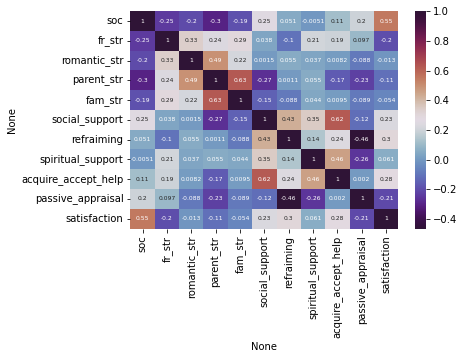

In [283]:
cor_heatmap = sns.heatmap(df_cor,annot=True, annot_kws={"size": 6},cmap='twilight_shifted')

In [296]:
cor_heatmap.get_figure().savefig('t.png',dpi=300)

### Regression Analysis

In [272]:
y = df.soc
x = df[['fr_str', 'romantic_str',
       'parent_str', 'fam_str', 'social_support', 'reframing',
       'spiritual_support', 'acquire_accept_help', 'passive_appraisal',
       'satisfaction']]

In [291]:
x =sm.add_constant(x)
reg = sm.OLS(y,x).fit()

In [274]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    soc   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     6.761
Date:                Mon, 12 Dec 2022   Prob (F-statistic):           3.80e-07
Time:                        14:07:05   Log-Likelihood:                -237.77
No. Observations:                  77   AIC:                             497.5
Df Residuals:                      66   BIC:                             523.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  66.9417      6.354     10.536      0.000      54.256      79.627
fr_str                 -0.5979      0.637     -0.938      0.352      -1.871       0.675
romantic_str           -0.6250      0.609     -1.026      0.309      -1.841       0.591
parent_str             -0.2306      0.789     -0.292      0.771      -1.806       1.345
fam_str                -0.0759      0.759     -0.100      0.921      -1.591       1.439
social_support          2.6141      1.104      2.367      0.021       0.409       4.819
reframing              -0.5102      0.990     -0.516      0.608      -2.486       1.466
spiritual_support       0.7867      0.866      0.909      0.367      -0.942       2.515
acquire_accept_help    -2.0853      1.026     -2.032      0.046      -4.135      -0.036
passive_appraisal       2.8452      0.892      3.190      0.002       1.065       4.626
satisfaction            0.7458      0.119      6.270      0.000       0.508       0.983
==============================================================================
Omnibus:                        0.394   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.821   Jarque-Bera (JB):                0.557
Skew:                           0.121   Prob(JB):                        0.757
Kurtosis:                       2.661   Cond. No.                         232.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Factors that affecting sense of coherence the most: satisfaction. The more you are satisfied with life, the better you can cope with stress from interpersonal relationships. Romantic and Friends have the highest influence respectively. 

Stress: All type of interpersonal stresses causes decreases in your sense of coherence.

Level of coping: 
    Reframing is not good for sense of coherence. Surprisingly,
    Spiritual_support helps for your sense of coherence. Spiritual support includes religion, the belief in a higher god, meditation, occultism
    